In [44]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display

In [32]:
df = None
is_df = False
for file in [x for x in os.listdir() if x.endswith('.csv')]:
    exchange_name = file.split('.')[0]
    print(exchange_name, os.path.getsize(file))
#     data = data.append(pd.read_csv(file, header=None), ignore_index=True)
    data = pd.read_csv(file, index_col=0, names=['price', 'amount'], header=None)
    data['exchange'] = exchange_name
    if is_df:
        df = df.append(data)
    else:
        df = data
        is_df = True

1coinUSD 32882417
anxhkUSD 27563611
b2cUSD 15237
b7USD 230007
bcLRUSD 18323
bcmBMUSD 9654
bcmLRUSD 16126
bcmMBUSD 5739
bcmPPUSD 121918
bitaloUSD 303
bitbayUSD 3987217
bitboxUSD 48163
bitcurexUSD 141083
bitfinexUSD 438362425
bitfloorUSD 8457104
bitkonanUSD 4700850
bitmarketUSD 120362
bitmeUSD 157706
bitstampUSD 499566168
btc24USD 239650
btcalphaUSD 17064703
btccUSD 2630096
btceUSD 1338139558
btcexUSD 428784
btctreeUSD 23857
cbxUSD 12383393
coinbaseUSD 695192864
cotrUSD 1111318
cryptoxUSD 828051
crytrUSD 832147
exchbUSD 1318718
exmoUSD 1421625
fbtcUSD 44315
globalUSD 5616
hitbtcUSD 45089896
ibwtUSD 1288
icbitUSD 345948
imcexUSD 32277
intrsngUSD 963950
itbitUSD 50996691
krakenUSD 64363054
lakeUSD 154001224
localbtcUSD 102902567
lybitUSD 3524
mtgoxUSD 351278809
rippleUSD 2222390
rockUSD 4552229
ruxumUSD 85224
thLRUSD 97421
thUSD 6607420
vcxUSD 3213753
weexUSD 6877


In [37]:
df.sort_index(inplace=True)
df.head()

,price,amount,exchange
946684800,55.000,0.001154,rippleUSD
1272213424,0.003,1000.000000,bcmPPUSD
1272321545,0.003,1300.000000,bcmPPUSD
1272636016,0.003,173.000000,bcmPPUSD
1272722427,0.003,174.000000,bcmPPUSD


In [78]:
print('rows:', df.shape[0])

rows: 90062456


In [49]:
# Drop bad row
df.drop(df.index[0], inplace=True)

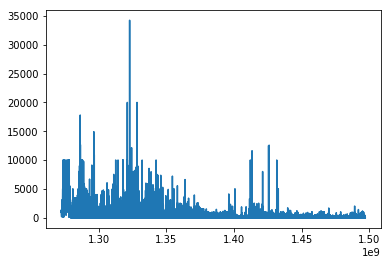

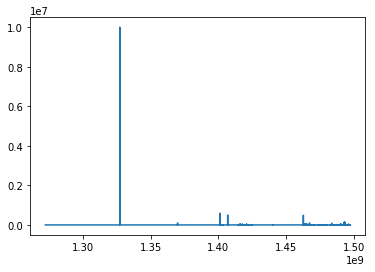

In [51]:
plt.plot('amount', data=df)
plt.show()
plt.plot('price', data=df)
plt.show()

**Amount**
* Volume spike in 1.325e9 (Late 2011)
* Volume spike in 1.425e9 (Late 2014/Late 2015)

**Price**
* Obvious outlier in Late 2011

In [57]:
# Drop outlier
df.drop(df['price'].idxmax(), inplace=True)

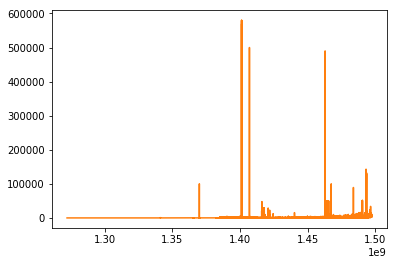

In [59]:
plt.plot('price', data=df)
plt.show()

In [72]:
price_gt_4k = df[df['price'] > 4000]
price_gt_4k['exchange'].value_counts()

localbtcUSD    8036
bitkonanUSD       2
bitbayUSD         1
anxhkUSD          1
cotrUSD           1
rippleUSD         1
Name: exchange, dtype: int64

In [89]:
localbtc_mask = [df['exchange'] == 'localbtcUSD']
np.sum(localbtc_mask)

2378395

The highest BTC price is sub $3k as of July 2017
* LocalBitcoins is a company in Finland that allows users to trade bitcoins in person.
* Their data is responsible for almost all of BTC txn over 4k.
 * This data is unreliable -> Drop
* We are also going to drop all prices \>\$4k


In [ ]:
df.drop(df[df.exchange == 'localbtcUSD'].index, inplace=True)
df.drop(df[df['price'] > 4000].index, inplace=True)
print(df.shape)

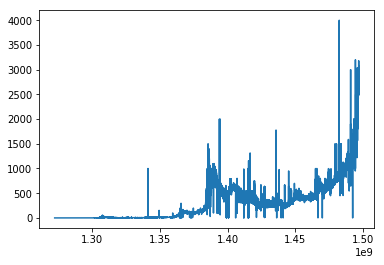

In [134]:
plt.plot('price', data=df)
plt.show()
print(df.shape)

In [135]:
df.index.duplicated()

array([False, False, False, ...,  True,  True,  True], dtype=bool)

In [109]:
localbtc_idx_lst = df[localbtc_mask[0]].index.tolist()

In [124]:
df[df.exchange == 'localbtcUSD'].index

Int64Index([1363046255, 1363116992, 1363177672, 1363194361, 1363197680,
            1363219234, 1363256410, 1363292918, 1363303499, 1363306939,
            ...
            1497000839, 1497000870, 1497000876, 1497000994, 1497001071,
            1497001076, 1497001187, 1497001338, 1497001354, 1497001456],
           dtype='int64', length=2378395)

In [123]:
t.shape[0] + 2378395

88532115

In [ ]:
# t = df.drop[localbtc_mask.index[localbtc_mask]]
# t = df['exchange'] == 'localbtcUSD'
# len(localbtc_idx_lst)
# localbtc_mask.index[localbtc_mask]

In [126]:
df.shape[0] - 2378395

87684061

In [116]:
df.loc[localbtc_idx_lst]

,price,amount,exchange
1363046255,72.000,4.999900,localbtcUSD
1363116992,67.790,1.999900,localbtcUSD
1363177672,52.210,14.768400,localbtcUSD
1363194361,56.290,0.640100,localbtcUSD
1363197680,40.000,1.750000,localbtcUSD
1363219234,70.300,1.422400,localbtcUSD
1363256410,47.470,11.102170,bitstampUSD
1363256410,51.320,0.876900,localbtcUSD
1363292918,43.799,0.100200,btceUSD
1363292918,50.400,2.976400,localbtcUSD


In [112]:
t

[1272213424    False
 1272321545    False
 1272636016    False
 1272722427    False
 1272808822    False
 1272895220    False
 1272981614    False
 1273004477    False
 1273075178    False
 1273083937    False
 1273084068    False
 1273154411    False
 1273175636    False
 1273240826    False
 1273244786    False
 1273338224    False
 1273524505    False
 1273524638    False
 1273525151    False
 1273599326    False
 1273599457    False
 1273601091    False
 1273692614    False
 1273694768    False
 1273694899    False
 1273701902    False
 1273703441    False
 1273845603    False
 1273845732    False
 1274209760    False
               ...  
 1497000756     True
 1497000768     True
 1497000770     True
 1497000772     True
 1497000791     True
 1497000801     True
 1497000802     True
 1497000833     True
 1497000839     True
 1497000870     True
 1497000876     True
 1497000994     True
 1497001071     True
 1497001076     True
 1497001158    False
 1497001187     True
 1497001338  

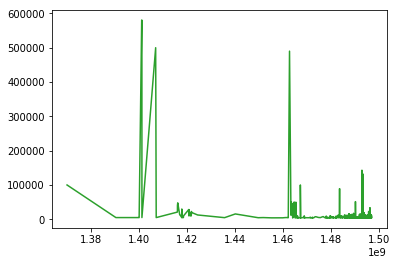

In [128]:
# price_gt_4k['exchange'].hist()
plt.plot('price', data=price_gt_4k)
plt.show()

In [50]:
df.head()

,price,amount,exchange
1272213424,0.003,1000.0,bcmPPUSD
1272321545,0.003,1300.0,bcmPPUSD
1272636016,0.003,173.0,bcmPPUSD
1272722427,0.003,174.0,bcmPPUSD
1272808822,0.003,174.0,bcmPPUSD


In [136]:
df.to_hdf("all_column_remove_localbtc.hdf", 'all')

In [46]:
data.head()

,price,amount,exchange
1338531940,1.0000,5.160,weexUSD
1338532387,2.0000,5.160,weexUSD
1338825840,1.0000,5.295,weexUSD
1338825888,2.0000,5.300,weexUSD
1338989783,5.8962,5.500,weexUSD


In [62]:
data_sort.shape

(90062458, 3)

In [63]:
## save
data_sort.to_hdf('all.hdf', 'all')

In [51]:
data.to_pickle("all.pkl")

OSError: [Errno 22] Invalid argument

In [45]:
data.shape

(1405557, 3)

In [41]:
newDF = pd.DataFrame() #creates a new dataframe that's empty
n = newDF.append(data, ignore_index = True) # ignoring index is optional
# try printing some data from newDF
print(n.head())#again optional 

       1     2
0  100.0  5.00
1   99.0  5.50
2   99.0  0.05
3  100.0  0.95
4  100.0  4.00


In [3]:
df = pd.read_hdf('all.hdf')

In [7]:
df.head()

,0,1,2
89666891,946684800,55.000,0.001154
1412591,1272213424,0.003,1000.000000
1412592,1272321545,0.003,1300.000000
1412593,1272636016,0.003,173.000000
1412594,1272722427,0.003,174.000000


In [ ]:
df.set_index()